# Intro

Ok. As we're warming up to the project, today's exercises is going to ask you to create our own micro-project. It'll be highly structured and hosted on the web-page you created last time. Before we can start on that there's a bit of reading first. 

Thus, today's lecture has two parts:

* More reading on Narrative Data Visualization.
* Creating a micro project based on our work in the class so far.

So let's get started 😀

## Part 1: More on narrative data viz

*Reading*. More on Narrative Visualization. Edward Segel and Jeffrey Heer. [Narrative Visualization: Telling Stories with Data](http://vis.stanford.edu/files/2010-Narrative-InfoVis.pdf), section 4-6.

> *Exercise*: Questions to the text
> 
> * What's the point of Figure 7?
> * Use Figure 7 to find the most common design choice within each category for the Visual narrative and Narrative structure (the categories within visual narrative are 'visual structuring', 'highlighting', etc).
> * Check out Figure 8 and section 4.3. What is your favorite genre of narrative visualization? Why? What is your least favorite genre? Why?

## Part 2: A short data story / micro-project

> *Exercise*: Create a short data-story based on the work we've done in class so far. (This exercise is a kind of "micro version" of what we'll be doing in the final project). Follow the directions in the bulleted list below when you create your data-story.

* **Find your own story to tell in the work on analyzing the SF Crime Data that we've done so far** (Week 1 - Week 6). The idea is to choose an insight about crime in SF (perhaps how something changed over the years) and communicate that insight to a general audience reader.
* The web-page should be hosted on your GitHub Pages site (Week 7).
* The format must be the classic *Magazine Genre* presented on a single web-page (see the Segel \& Heer paper for details.
* The story should have a brief introduction to the dataset so new readers from outside the class can understand what's going on.
* Your story should include three visualizations. Not more than three, not less than three (but multi-panel figures are OK). The figures should be one of each of the following types
  - One time-series / bar chart (it's OK to use the "fancy" plot-typs like calendar plots or polar bar-charts from Week 2, Part 4).
  - One map (use techniques from Week 3 and 4)
  - One interactive visualization in Bokeh (Week 6)
* **At a minimum, the Bokeh visualization should contain different data** than the exercise we did for Week 6 (it's a plus if it's a new type of viz altogether). 
* The two other visualization may be repetitions of figures created during the previous lectures, or they may be new.
* Make the figures nice. Specifically:
  - Aim to make the figures visually consistent (color, fonts, etc)
  - Follow the recommendations from my video on nice figures (Week 2)
* In terms of the amount of text, I envision something like 500-1500 words (including figure captions).
* It is a plus if you can back up some of your findings with external sources, such as news stories from the area, looking up which building is located at some set of `lat,lon` coordinates, or similar. (So when you see something happening at some time/place in the data, see if you can understand it more deeply by investigating outside the dataset.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [92]:
df_before_2018 = pd.read_csv('../Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')
df_before_2018['Date'] = pd.to_datetime(df_before_2018['Date'])
df_before_2018['Year'] = df_before_2018['Date'].dt.year
df_before_2018['Month'] = df_before_2018['Date'].dt.month
df_before_2018['Hour'] = pd.DatetimeIndex(df_before_2018['Time']).hour
df_before_2018 = df_before_2018.loc[df_before_2018['Year'] != 2018]

In [120]:
df_before_2018.shape

(2084466, 38)

In [7]:
df_after_2018 = pd.read_csv('../Police_Department_Incident_Reports__2018_to_Present.csv')

In [ ]:
# category1 = df_before_2018['Category'].unique().tolist()
# category2 = df_after_2018['Incident Category'].unique().tolist()

# category1

In [ ]:
# category2 = [ele.upper() if isinstance(ele, str) else ele for ele in category2]
# category2

In [ ]:
# c = list(set(category1).intersection(set(category2)))
# c

In [ ]:
# df_after_2018.loc[df_after_2018['Incident Category']=='Robbery']

In [ ]:
df_before_2018.loc[df_before_2018['Category'] == 'ROBBERY']

## Timeseries: bar chart + some calendar plots

In [79]:
focuscrimes = ['ROBBERY']

In [80]:
hour_of_day = [i for i in range(0,24)]
hourly_slots = {}
for i in range(len(hour_of_day)):
    if i+1 == len(hour_of_day):
        start = hour_of_day[i]
        end = hour_of_day[0]
        hourly_slots[start] = str(start) + "-" + str(end)
    else:
        start = hour_of_day[i]
        end = hour_of_day[i+1]
        hourly_slots[start] = str(start) + "-" + str(end)

In [81]:

df_before_2018["time_period"] = [hourly_slots[int(str(i).split(":")[0])] for i in list(df_before_2018['Hour'])]

In [82]:
hourly_pattern = df_before_2018.groupby(by=["time_period", "Category"]).size().reset_index(name="Count")

hourly_pattern = hourly_pattern.loc[hourly_pattern['Category'].isin(focuscrimes)].reset_index(drop=True)

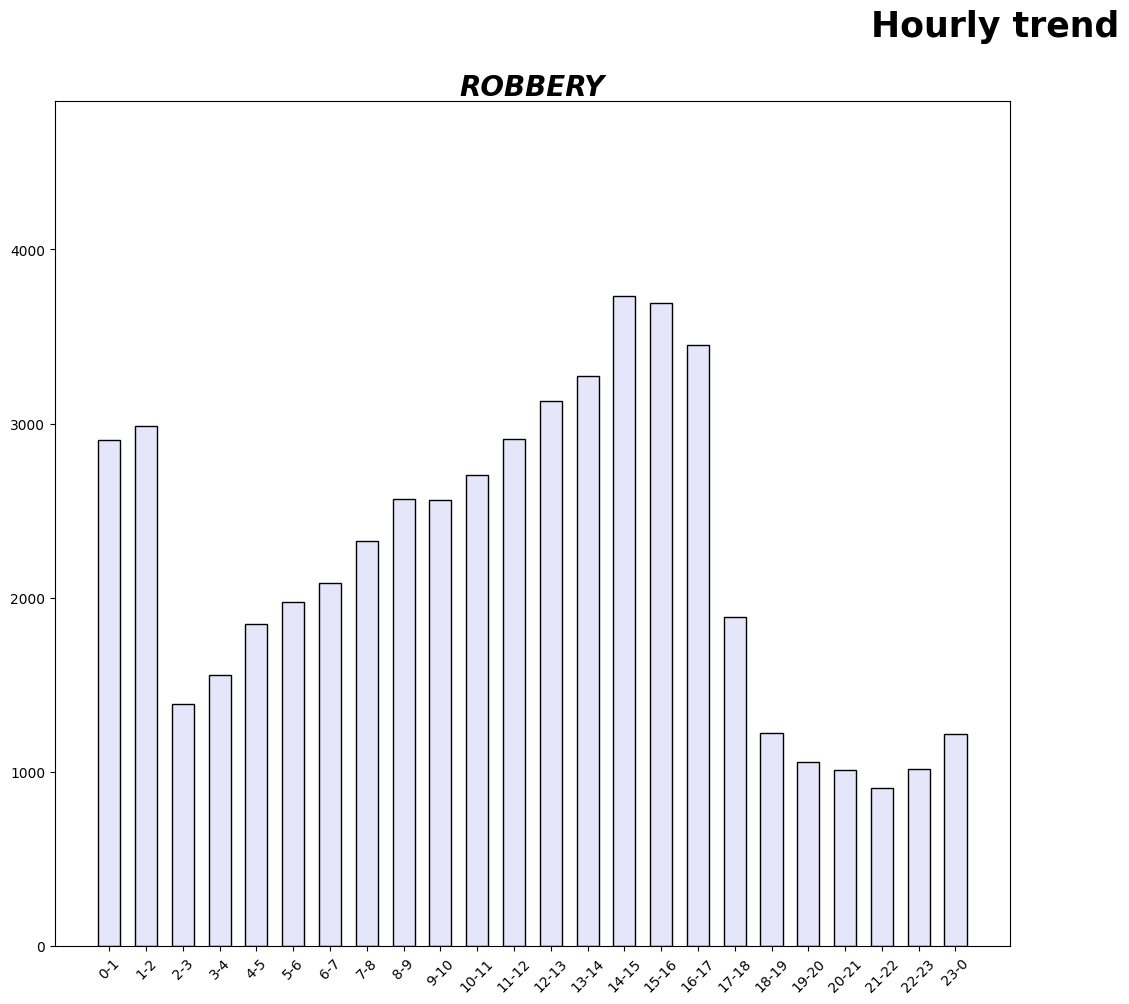

In [108]:
plt.figure(figsize=(20,10))
plt.suptitle("Hourly trend" ,fontsize=25, y=1.0, fontweight='bold', color='black')
for i in range(len(focuscrimes)):
    temp = hourly_pattern.loc[hourly_pattern['Category'] == focuscrimes[i]].reset_index(drop=True)
    x = temp["time_period"]
    y = temp["Count"]

    plt.subplot(int(len(focuscrimes)),2,i+1)
    plt.title(focuscrimes[i], pad=-14, fontsize = 20, fontweight='bold', fontstyle="italic")
    plt.bar(x, y, width=0.6, edgecolor="black", color='lavender')
    plt.xticks(x, hourly_slots.values(), rotation=45)
    plt.tight_layout()
    plt.ylim(top=(np.max(y)+(np.max(y)*0.3)))


Yearly pattern

In [86]:
yearly_pattern = df_before_2018.groupby(by=["Year", "Category"]).size().reset_index(name="Count")

yearly_pattern = yearly_pattern.loc[yearly_pattern['Category'].isin(focuscrimes)].reset_index(drop=True)

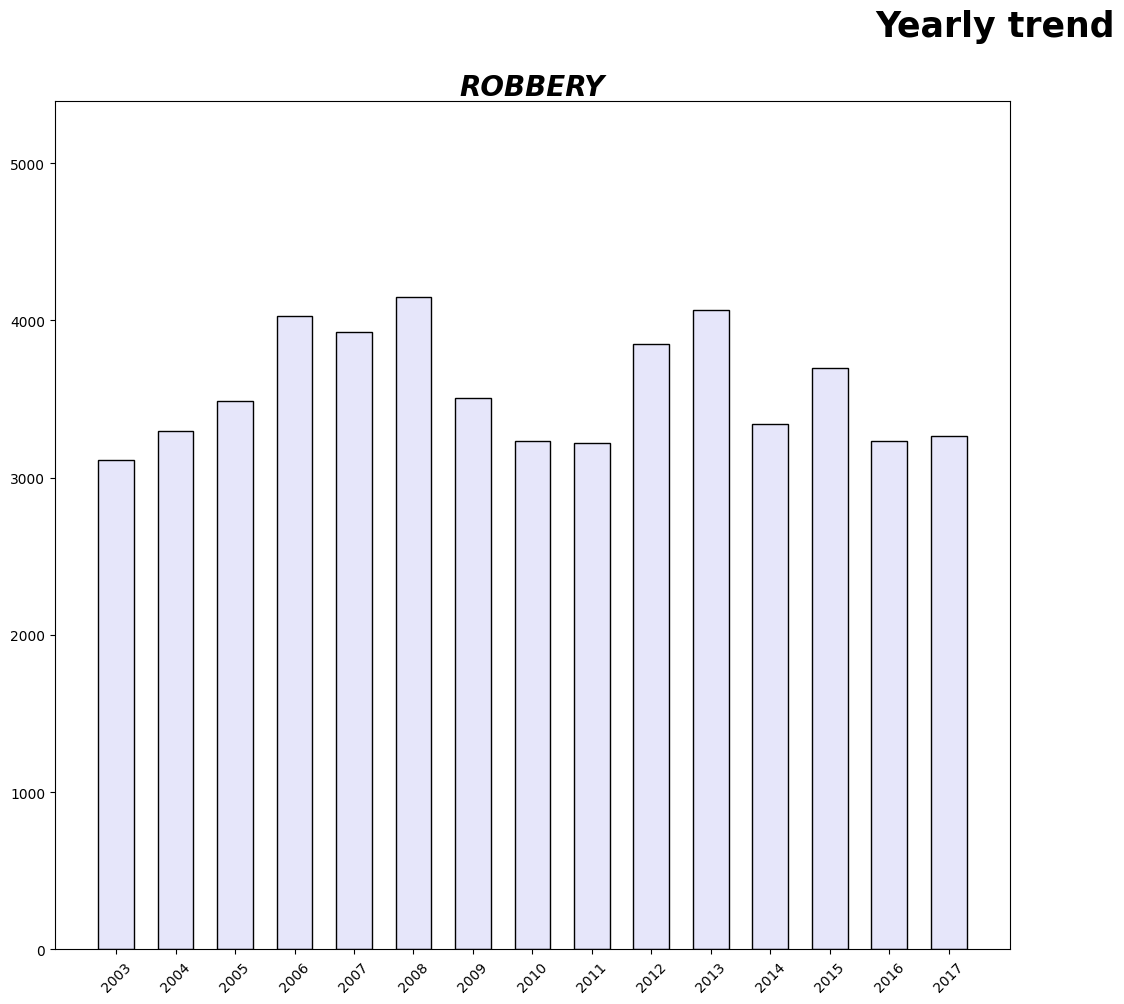

In [87]:
x_values = yearly_pattern['Year'].unique().tolist()

plt.figure(figsize=(20,10))
plt.suptitle("Yearly trend" ,fontsize=25, y=1.0, fontweight='bold', color='black')
for i in range(len(focuscrimes)):
    temp = yearly_pattern.loc[yearly_pattern['Category'] == focuscrimes[i]].reset_index(drop=True)
    x = temp["Year"]
    y = temp["Count"]

    plt.subplot(int(len(focuscrimes)),2,i+1)
    plt.title(focuscrimes[i], pad=-14, fontsize = 20, fontweight='bold', fontstyle="italic")
    plt.bar(x, y, width=0.6, edgecolor="black", color='lavender')
    plt.xticks(x, x_values, rotation=45)
    plt.tight_layout()
    plt.ylim(top=(np.max(y)+(np.max(y)*0.3)))

Robbery: significantly decreased from 2009 to 2010. The [Rand Corporation](https://www.rand.org/) studied this phenomenon on a national level in 2010, concluding that the crime prevention benefit of hiring more officers is well worth the cost. [Reference](https://countyda.sccgov.org/sites/g/files/exjcpb1121/files/10-Year%20Combined%20CA%20Crime%20Stat%20Report.pdf)

Calendar plot

In [ ]:
df_robbery = df_before_2018.loc[df_before_2018['Category']=="ROBBERY"]
df_robbery = df_robbery[df_robbery["Year"] == 2012]

In [ ]:
robbery_count_by_day = (
    df_robbery.groupby(df_robbery["Date"])["IncidntNum"]
    .nunique()
    .rename("Count")
)

robbery_count_by_day.index = pd.to_datetime(robbery_count_by_day.index)

In [ ]:
import calplot

focuscrime2 = ["ROBBERY"]
filter = df_before_2018["Category"].isin(focuscrime2)
incidents13to18_f2 = df_before_2018[filter]
crimesDate= incidents13to18_f2.groupby("Date")["IncidntNum"].count()
crimesDate_df =  pd.DataFrame(crimesDate)

fig, ax = calplot.calplot(crimesDate_df['IncidntNum'], cmap='Purples', figsize=(20, 40))

plt.show()

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


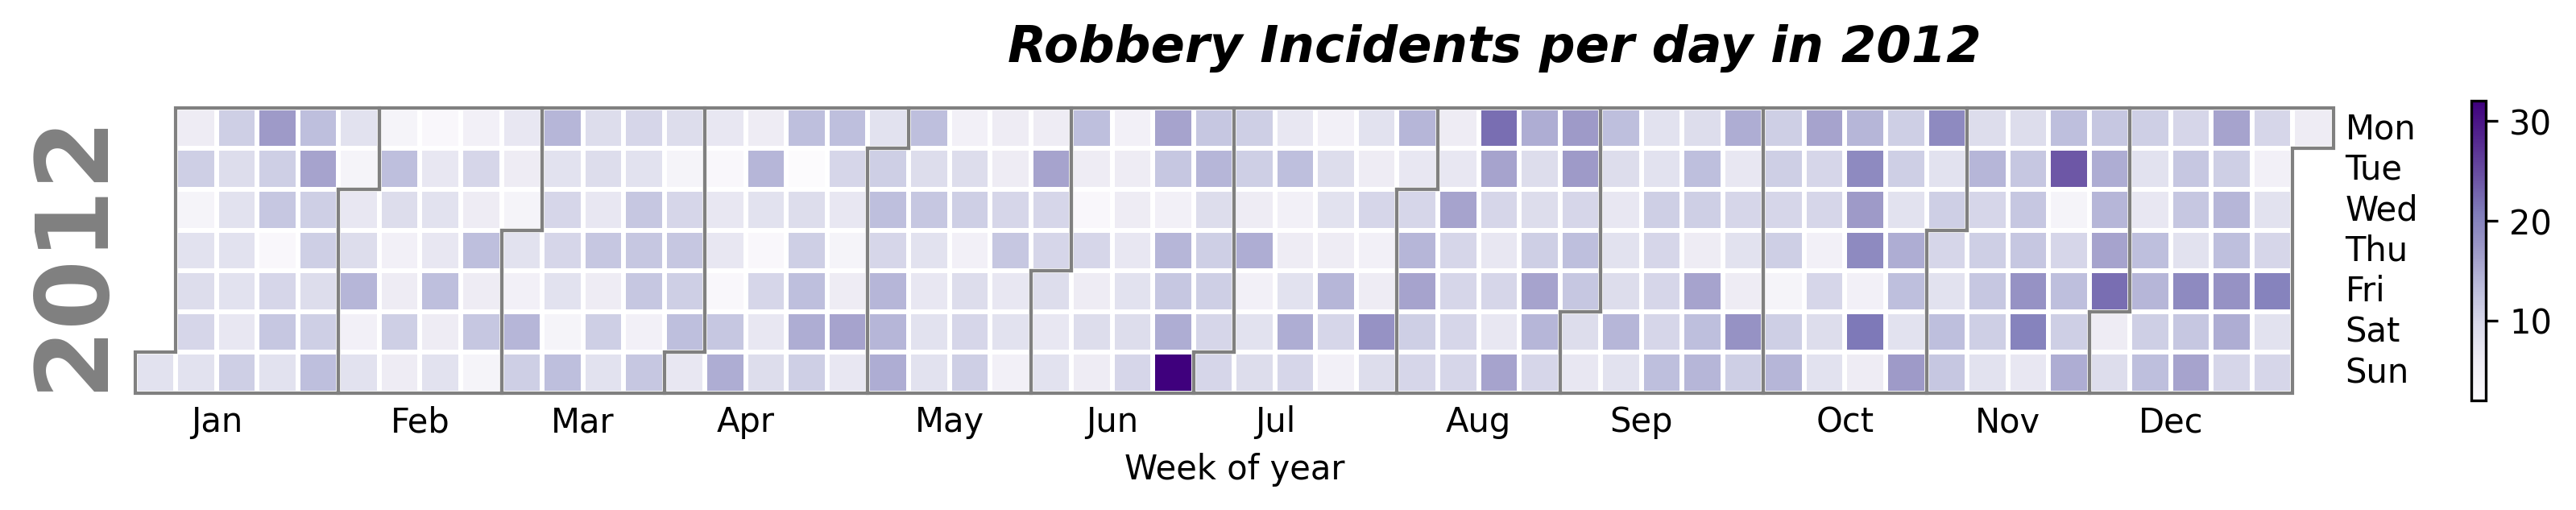

In [179]:
fig_single, axs = calplot.calplot(robbery_count_by_day, cmap="Purples")
fig_single.set_dpi(300)

fig_single.suptitle("Robbery Incidents per day in 2012", fontsize=15, y=1.1, fontweight='bold', color='black', fontstyle="italic")
axs[0].set_xlabel("Week of year", fontsize=10)

fig_single.savefig('Calplot_2012.png', bbox_inches='tight')

On 24 June 2012, the San Francisco LGBT Pride Parade took place in San Francisco. The parade began at Market Street and Beale Street, then proceeded down Market Street to 8th Street. 

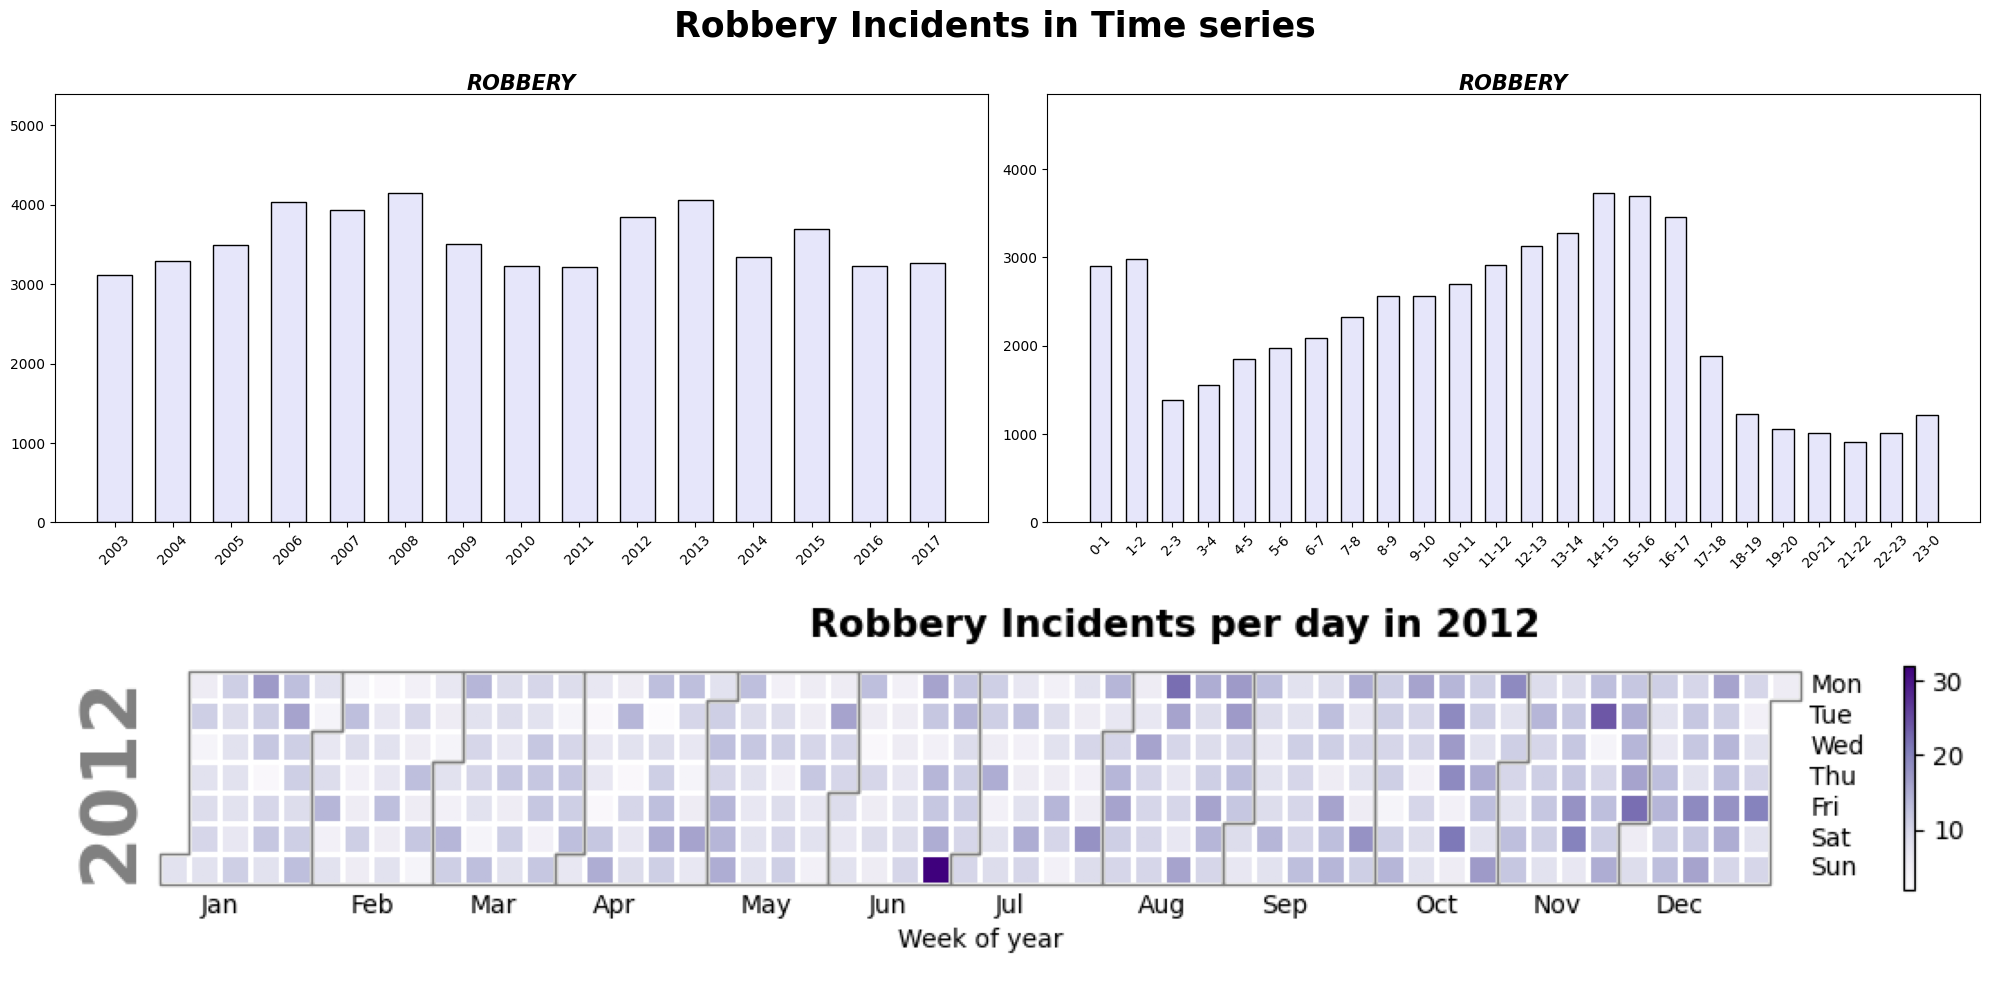

In [178]:
import matplotlib.image as mpimg

plt.figure(figsize=(20,10))
plt.suptitle("Robbery Incidents in Time series" ,fontsize=25, y=1.0, fontweight='bold', color='black')

# Yealy trend
temp1 = yearly_pattern.loc[yearly_pattern['Category'] == 'ROBBERY'].reset_index(drop=True)
x = temp1["Year"]
y = temp1["Count"]
plt.subplot(2,2,1)
plt.title('ROBBERY', pad=-14, fontsize = 15, fontweight='bold', fontstyle="italic")
plt.bar(x, y, width=0.6, edgecolor="black", color='lavender')
plt.xticks(x, yearly_pattern['Year'].unique().tolist(), rotation=45)
plt.tight_layout()
plt.ylim(top=(np.max(y)+(np.max(y)*0.3)))

# Hourly trend
temp2 = hourly_pattern.loc[hourly_pattern['Category'] == 'ROBBERY'].reset_index(drop=True)
x = temp2["time_period"]
y = temp2["Count"]
plt.subplot(2,2,2)
plt.title('ROBBERY', pad=-14, fontsize = 15, fontweight='bold', fontstyle="italic")
plt.bar(x, y, width=0.6, edgecolor="black", color='lavender')
plt.xticks(x, hourly_slots.values(), rotation=45)
plt.tight_layout()
plt.ylim(top=(np.max(y)+(np.max(y)*0.3)))

# Calplot
img = mpimg.imread('Calplot_2012.png')
plt.subplot(2,1,2)
plt.imshow(img)
plt.axis('off')

plt.tight_layout()

## Maps

In [162]:
import folium
from folium.plugins import HeatMap
from folium.plugins import DualMap

In [ ]:
df_robbery_pride = df_robbery[df_robbery['Date'] == '2012-6-24']

In [111]:

get_XY = list(zip(list(df_robbery_pride["Y"]), list(df_robbery_pride["X"])))

SF_map = folium.Map([37.77919, -122.41914], zoom_start=13, tiles = "openstreetmap")
folium.Marker([37.77351584799628, -122.42148577465927], popup="Market Street").add_to(SF_map)
folium.Marker([37.78907067508782, -122.3929690574588], popup="Beala Street").add_to(SF_map)
folium.Marker([37.77295458293956, -122.40701151351163], popup='8th Street').add_to(SF_map)

for x,y in get_XY:
    folium.CircleMarker([x, y],
                    radius=2,
                    color='red',
                    ).add_to(SF_map)
SF_map.save('SF_Robbery_24_Jun_2012.html')
SF_map


As Market Street is the center of SF with a high density of population during days (as shown on the viz above), we labeled the police districts (PdDistrict) and look into the occurances of robbery with a heatmap.

In [172]:
SF_map = folium.plugins.DualMap(location=[37.77919, -122.41914],
                    zoom_start = 12,
                    tiles = "openstreetmap")

constraint = (df_before_2018['Category'] == 'ROBBERY') & (df_before_2018['Year'] >= 2011) & (df_before_2018['Year'] <= 2012) & (df_before_2018['Resolution'] == "ARREST, BOOKED")
df_robbery_heat = df_before_2018.loc[constraint].reset_index(drop=True)


get_XY = list(zip(list(df_robbery_pride["Y"]), list(df_robbery_pride["X"])))

SF_map = folium.Map([37.77919, -122.41914], zoom_start=13, tiles = "openstreetmap")
folium.Marker([37.77351584799628, -122.42148577465927], popup="Market Street").add_to(SF_map)
folium.Marker([37.78907067508782, -122.3929690574588], popup="Beala Street").add_to(SF_map)
folium.Marker([37.77295458293956, -122.40701151351163], popup='8th Street').add_to(SF_map)

for x,y in get_XY:
    folium.CircleMarker([x, y],
                    radius=2,
                    color='red',
                    ).add_to(SF_map)


x_y_robbery = list(zip(list(df_robbery_heat["Y"]), list(df_robbery_heat["X"])))

HeatMap(x_y_robbery, min_opacity=0.35, overlay=True).add_to(SF_map)

SF_map

In [175]:
df_robbery_pride['PdDistrict'].value_counts()

SOUTHERN      10
MISSION        6
PARK           4
NORTHERN       3
TENDERLOIN     3
CENTRAL        2
INGLESIDE      2
BAYVIEW        2
TARAVAL        1
Name: PdDistrict, dtype: int64